In [2]:
import numpy as np
import pandas as pd
import math as mt
import scipy.optimize as opt
import scipy.stats as sta
import matplotlib.pyplot as plt
import csv

print("Hallo!")

Hallo!


In [3]:
## some scale factors and constant you might use

## mass square of muon: m_muon^2 (in GeV)
sqm1 = (0.105658) * (0.105658)
## mass square of electron: m_e^2 (in GeV)
sqme = (0.0005109989) * (0.0005109989)
## mass of Z boson (in GeV)
mZ = 91.1876


## constants for the scale factor of MC. The MC is produced at a certain cross section\
## with certain number of events. To increase statistics, the event numbers generated are usually very large,\
## therefore a scale factor is needed to apply on the MC to make them agree with data.
## Scale factor for each MC component is: lumi * xsec / nevt, as provided below

## Luminosity of each year
lumi12 = 11580.
lumi11 = 2330.

## MC cross section of each process
xsecZZ412 = 0.107
xsecZZ2mu2e12 = 0.249
xsecZZ411 = 0.093
xsecZZ2mu2e11 = 0.208

xsecTTBar12 = 200.
xsecTTBar11 = 19.504

xsecDY5012 = 2955.
xsecDY1012 = 10.742
xsecDY5011 = 2475.
xsecDY1011 = 9507.
  
scalexsecHZZ12 = 0.0065
scalexsecHZZ11 = 0.0057

## Number of MC Events generated for each process
nevtZZ4mu12 = 1499064
nevtZZ4e12 = 1499093
nevtZZ2mu2e12 = 1497445
nevtHZZ12 = 299973 
nevtTTBar12 = 6423106
nevtDY5012 = 29426492
nevtDY1012 = 6462290
  
nevtZZ4mu11 = 1447136
nevtZZ4e11 = 1493308
nevtZZ2mu2e11 = 1479879
nevtHZZ11 = 299683
nevtTTBar11 = 9771205
nevtDY5011 = 36408225
nevtDY1011 = 39909640


labels = ['$m_{H}$ = 125 GeV', r'ZZ $\rightarrow$ 4l', 'Z/$\gamma^{*}$ + X', r'$t\bar{t}$']
colors = ['r','b','g','gray']
scales_higgs = [lumi11*scalexsecHZZ11/nevtHZZ11, lumi12*scalexsecHZZ12/nevtHZZ12]
scales_zz = [lumi11*xsecZZ411/nevtZZ4mu11, lumi11*xsecZZ2mu2e11/nevtZZ2mu2e11, lumi11*xsecZZ411/nevtZZ4e11,\
             lumi12*xsecZZ412/nevtZZ4mu12, lumi12*xsecZZ2mu2e12/nevtZZ2mu2e12, lumi12*xsecZZ412/nevtZZ4e12]
scales_dy = [lumi11*xsecDY1011/nevtDY1011, lumi11*xsecDY5011/nevtDY5011, \
             lumi12*xsecDY1012/nevtDY1012, lumi11*xsecDY5012/nevtDY5012]
scales_tt = [lumi11*xsecTTBar11/nevtTTBar11, lumi12*xsecTTBar12/nevtTTBar12]

In [4]:
### open the files ###
# read datalist of each year and combine to one 
data_year  = [pd.read_csv('./data/clean_data_2011.csv',index_col=None, header=0)]
data_year += [pd.read_csv('./data/clean_data_2012.csv',index_col=None, header=0)]
data = pd.concat(data_year,axis=0,ignore_index=True)


# read MClist of each process and each year
mc_higgs_11 = pd.read_csv('./MC/higgs2011.csv',index_col=None, header=0)
mc_higgs_12 = pd.read_csv('./MC/higgs2012.csv',index_col=None, header=0)
## ZZ*
mc_zz4mu_11 = pd.read_csv('./MC/zzto4mu2011.csv',index_col=None, header=0)
mc_zz2mu2e_11 = pd.read_csv('./MC/zzto2mu2e2011.csv',index_col=None, header=0)
mc_zz4e_11 = pd.read_csv('./MC/zzto4e2011.csv',index_col=None, header=0)

mc_zz4mu_12 = pd.read_csv('./MC/zzto4mu2012.csv',index_col=None, header=0)
mc_zz2mu2e_12 = pd.read_csv('./MC/zzto2mu2e2012.csv',index_col=None, header=0)
mc_zz4e_12 = pd.read_csv('./MC/zzto4e2012.csv',index_col=None, header=0)
## Drell-Yan
mc_dy10_11 = pd.read_csv('./MC/dy1050_2011.csv',index_col=None, header=0)
mc_dy50_11 = pd.read_csv('./MC/dy50_2011.csv',index_col=None, header=0)
mc_dy10_12 = pd.read_csv('./MC/dy1050_2012.csv',index_col=None, header=0)
mc_dy50_12 = pd.read_csv('./MC/dy50_2012.csv',index_col=None, header=0)
## ttbar
mc_ttbar_11 = pd.read_csv('./MC/ttbar2011.csv',index_col=None, header=0)
mc_ttbar_12 = pd.read_csv('./MC/ttbar2012.csv',index_col=None, header=0)


# creat a combined list of MC to study the shape
mc_higgs = [mc_higgs_11, mc_higgs_12]
mc_zz = [mc_zz4mu_11, mc_zz2mu2e_11, mc_zz4e_11, mc_zz4mu_12, mc_zz2mu2e_12, mc_zz4e_12]
mc_dy = [mc_dy10_11, mc_dy50_11, mc_dy10_12, mc_dy50_12]
mc_tt = [mc_ttbar_11, mc_ttbar_12]

mc_sig = pd.concat(mc_higgs,axis=0,ignore_index=True)
mc_bkg_zz = pd.concat(mc_zz,axis=0,ignore_index=True)
mc_bkg_dy = pd.concat(mc_dy,axis=0,ignore_index=True)
mc_bkg_tt = pd.concat(mc_tt,axis=0,ignore_index=True)

## For Selections:
mc_all = [mc_higgs, mc_zz, mc_dy, mc_tt]

In [5]:
print(mc_all)

[[       Run  Event  PID1  Q1        E1        px1       py1        pz1  \
0        1   1211    13  -1  103.1340 -15.457900 -37.22850 -94.929800   
1        1   1221    11  -1   58.4841 -57.275900  11.53270   2.619150   
2        1   1229    13  -1   20.5717  -0.091805 -17.69950 -10.483500   
3        1   1234   -13   1   26.6667 -12.349900  23.62880  -0.509423   
4        1   1240   -13   1   20.3893  16.618900  -3.74451 -11.202800   
...    ...    ...   ...  ..       ...        ...       ...        ...   
52243    1  80092    13  -1   49.7937 -34.444100 -11.97410 -33.906100   
52244    1  80093   -13   1   45.4579 -25.094300  34.91920 -14.742400   
52245    1  80095    13  -1   62.6243  40.768700   7.70118 -46.908500   
52246    1  80098   -13   1   22.6646 -15.410700 -10.46860  12.907000   
52247    1  80100    13  -1   47.4891 -32.717300 -15.86550  30.546200   

           eta1      phi1  ...      eta3      phi3  PID4  Q4         E4  \
0     -1.591980 -1.964350  ... -0.423991 -0.37

In [6]:
#This is in the header of the csv file:
#Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
def ReadEntries(lis):
    return lis['PID1'],lis['Q1'],lis['E1'],lis['px1'],lis['py1'],lis['pz1'],lis['eta1'],lis['phi1'], \
    lis['PID2'],lis['Q2'],lis['E2'],lis['px2'],lis['py2'],lis['pz2'],lis['eta2'],lis['phi2'], \
    lis['PID3'],lis['Q3'],lis['E3'],lis['px3'],lis['py3'],lis['pz3'],lis['eta3'],lis['phi3'], \
    lis['PID4'],lis['Q4'],lis['E4'],lis['px4'],lis['py4'],lis['pz4'],lis['eta4'],lis['phi4']

def pt(px, py):
    return np.sqrt(px**2 + py**2)

def invMass(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

def InvMass_4l(lists):   ### faster way to get the 4l-system invMass directly from the list, as you may repeately run it for the final plot###
    E_tot = lists['E1'] + lists['E2'] + lists['E3'] + lists['E4']
    px_tot = lists['px1'] + lists['px2'] + lists['px3'] + lists['px4']
    py_tot = lists['py1'] + lists['py2'] + lists['py3'] + lists['py4']
    pz_tot = lists['pz1'] + lists['pz2'] + lists['pz3'] + lists['pz4']
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

In [7]:
def PlotShape(variable, rmin, rmax, nbins):
    for i,var in enumerate(variable):
        hist, bins = np.histogram(var, bins = nbins, range = (rmin,rmax))
        bincenter = 0.5 * (bins[:-1] + bins[1:])
        plt.plot(bincenter, hist * (1./len(var)), color = colors[i], label=labels[i])
    plt.legend(fontsize = 20)

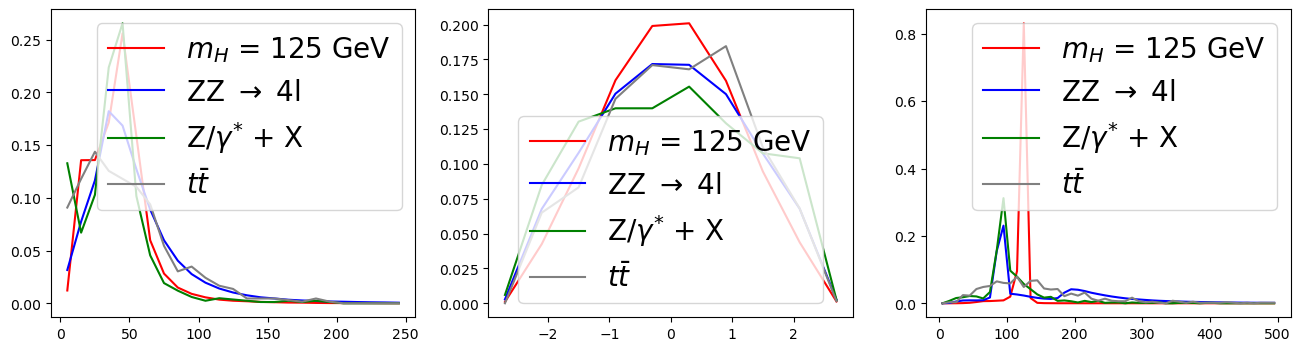

In [8]:
pt1_sig = pt(mc_sig['px1'], mc_sig['py1'])
pt1_bkg_zz = pt(mc_bkg_zz['px1'], mc_bkg_zz['py1'])
pt1_bkg_dy = pt(mc_bkg_dy['px1'], mc_bkg_dy['py1'])
pt1_bkg_tt = pt(mc_bkg_tt['px1'], mc_bkg_tt['py1'])

pt1 = [pt1_sig,pt1_bkg_zz,pt1_bkg_dy,pt1_bkg_tt]
eta1 = [mc_sig['eta1'], mc_bkg_zz['eta1'], mc_bkg_dy['eta1'], mc_bkg_tt['eta1']]
invM4l = [InvMass_4l(mc_sig),InvMass_4l(mc_bkg_zz),InvMass_4l(mc_bkg_dy),InvMass_4l(mc_bkg_tt)]

plt.figure(figsize = (16,4))
plt.subplot(1, 3, 1)
PlotShape(pt1, 0, 250, 25)
plt.subplot(1, 3, 2)
PlotShape(eta1, -3, 3, 10)
plt.subplot(1, 3, 3)
PlotShape(invM4l, 0, 500, 50)

In [9]:
def obj(pid,px,py,eta):  ## object selection for a single object
    pt_obj = pt(px,py)
    if (np.abs(pid) == 13 and pt_obj > 5.) or (np.abs(pid) == 11 and pt_obj > 7.):
    #if (np.abs(pid) == 13 and pt_obj > 5. and ...) or (np.abs(pid) == 11 and pt_obj > 7. and ...):
        return 1
    else:
        return 0
    
    
def objsel(lis):  ## Creat an column to the dataset indicating whether this event passes the object selection
    pass_obj = []
    for row in lis.itertuples():   ## loop over each event(each row)
        pass_obj.append(obj(row.PID1,row.px1,row.py1,row.eta1) and obj(row.PID2,row.px2,row.py2,row.eta2) and obj(row.PID3,row.px3,row.py3,row.eta3) and obj(row.PID4,row.px4,row.py4,row.eta4))
    lis['PassObj'] = pass_obj       

In [10]:
def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):

    if(PID1+PID2+PID3+PID4 != 0):    ### charge conservation and lepton flavor conservation
        return 0
    
    #########################################
    ########## More Selections ##############
    #########################################
    
    pt1 = pt(px1,py1)
    pt2 = pt(px2,py2)
    pt3 = pt(px3,py3)
    pt4 = pt(px4,py4)

    if(PID1 != PID2 and PID1 != PID3 and PID1 != PID4): ### 2mu2e event, only one combination
        m_z1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
        m_z2 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
        ### More Selections ####
        ### If XXX return 1...##
        ########################
    else: ### 4mu or 4e event, 3 different combination
        ##c1
        m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
        m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
        ##c2
        m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
        m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
        ##c3
        m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
        m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
        ################# More Selections ###########################################
        ### among the 3 combination based on charge and mass to mass of the Z boson##
        #############################################################################

    return 1
        


def evtsel(lis):   ### Similar as the Function: objsel shown above
    pass_evt = []
    for row in lis.itertuples():
        pass_evt.append(evt(row.PID1,row.Q1,row.E1,row.px1,row.py1,row.pz1,\
                            row.PID2,row.Q2,row.E2,row.px2,row.py2,row.pz2,\
                            row.PID3,row.Q3,row.E3,row.px3,row.py3,row.pz3,\
                            row.PID4,row.Q4,row.E4,row.px4,row.py4,row.pz4))
    lis['PassEvt'] = pass_evt

In [11]:
### Apply object selection and event selection to data and each MC process###

objsel(data)
evtsel(data)
print(data)
data = data.query('PassObj == 1 and PassEvt == 1')

for i,bkg in enumerate(mc_all):
    for j,pro in enumerate(bkg):
        objsel(pro)
        evtsel(pro)
        mc_all[i][j] = pro.query('PassObj == 1 and PassEvt == 1')

/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:24: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:29: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:26: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:27: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E

         Run      Event  PID1  Q1         E1       px1       py1         pz1  \
0     160957  474149791   -13   1   20.13980  -7.61603  11.54710   14.637600   
1     160957  475508059    13  -1    7.74065  -4.99690  -5.90112   -0.338132   
2     160998  143208778    13  -1   21.25180  -3.74665  -6.08794   20.013200   
3     161016   88729201    13  -1    8.23905  -4.98656   3.22091   -5.712330   
4     161103   72943593   -13   1   38.21730  -8.29373   7.24964   36.595200   
...      ...        ...   ...  ..        ...       ...       ...         ...   
2719  203002  630169854    13  -1  161.05200 -29.15820  52.86600 -149.307000   
2720  203002  714998441   -13   1   76.87830   9.13736  34.28980   68.198000   
2721  203002  768688424   -13   1   37.45650 -34.65030 -11.53190    8.327820   
2722  203002   78542112   -13   1   18.71270  -1.20070   4.50190   18.123000   
2723  203002  891197461   -13   1   14.95760   4.06168  -2.07323  -14.245100   

          eta1      phi1  ...  PID4  Q4

/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:23: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
/var/folders/sr/vjrwr3j53tx0d4lzwqx431j00000gn/T/ipykernel_91574/3934057786.py:24: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))


In [12]:
def HistInvMass4l(lis, scales, rmin, rmax, nbins):
    hist_lis = []
    for i,pro in enumerate(lis):
        invM = InvMass_4l(pro)
        hist, bins = np.histogram(invM, bins = nbins, range = (rmin,rmax))
        hist = hist * scales[i]
        hist_lis.append(hist)
    return sum(hist_lis)

In [13]:
rmin = 50
rmax = 200
nbins = 50


hist_higgs = HistInvMass4l(mc_higgs,scales_higgs,rmin, rmax, nbins)
hist_zz = HistInvMass4l(mc_zz,scales_zz,rmin, rmax, nbins)
hist_dy= HistInvMass4l(mc_dy,scales_dy,rmin, rmax, nbins)
hist_tt= HistInvMass4l(mc_tt,scales_tt,rmin, rmax, nbins)

hist_mc = [hist_tt, hist_dy, hist_zz, hist_higgs]

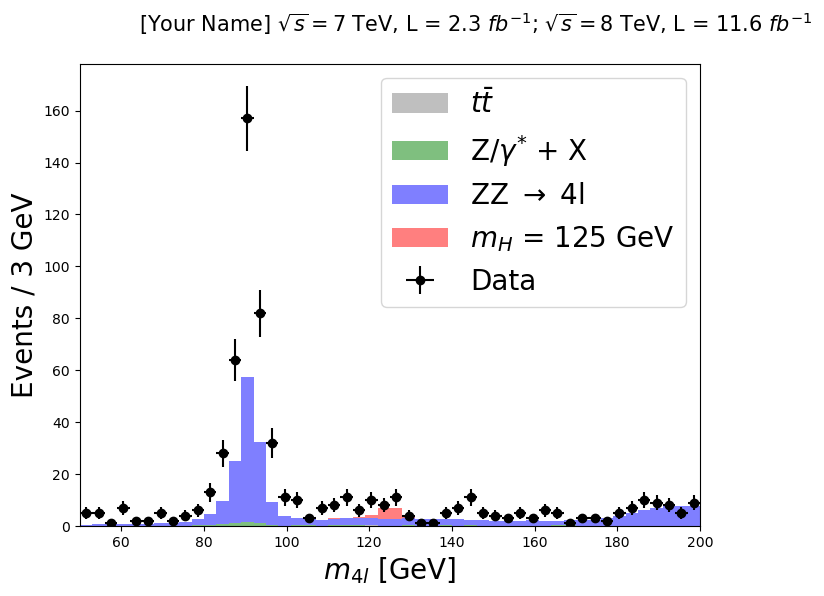

In [15]:
## Now Plot it!!!

plt.figure(figsize = (8,6))
#plt.style.use('mystyle.mplstyle')


## data
inM_data = InvMass_4l(data)
hist, bins = np.histogram(inM_data, bins = nbins, range = (rmin,rmax))
binwidth = bins[1] - bins[0]
bincenter = 0.5 * (bins[:-1] + bins[1:])


## MC
for i,pro in enumerate(hist_mc):
    if i == 0:
        stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 alpha = 0.5)
        bot = pro
    else:
        stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 bottom = bot, alpha = 0.5)
        bot = bot + pro



## Measured data
xerrs = [binwidth*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)
marker_data = plt.errorbar(bincenter, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')



plt.title('[Your Name] $ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 15, position=(0.64,0.95))
plt.xlabel('$m_{4l}$ [GeV]',fontsize = 20, position=(0.92,0.1))
plt.ylabel('Events / 3 GeV',fontsize = 20, position=(0.1,0.84))
plt.xlim(rmin,rmax)
plt.legend(fontsize = 20)

plt.show()